# Dosenbach2007 — Figure 5

This notebook plots distribution of correlations in group-average resting connectome of all subjects in Julia2018 dataset, as seen in Figure 5 of Dosenbach2007.

The original Figure 5 is shown below.

![Figure 5](https://www.ncbi.nlm.nih.gov/pmc/articles/PMC1904171/bin/pnas_0704320104_04320Fig5.jpg)

> Fig. 5. Histogram of the distribution of all 741 r values (0.01 bins). The interregional r values for our set of 39 ROIs were roughly symmetrically distributed around zero, with the preponderance of values occurring in the range from 0.2 to 0.2. This distribution showed a local minimum at 0.2 and a long right-sided tail of r values >0.2.

In [1]:
project_dir = '../..'

In [2]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

from scipy.signal import find_peaks

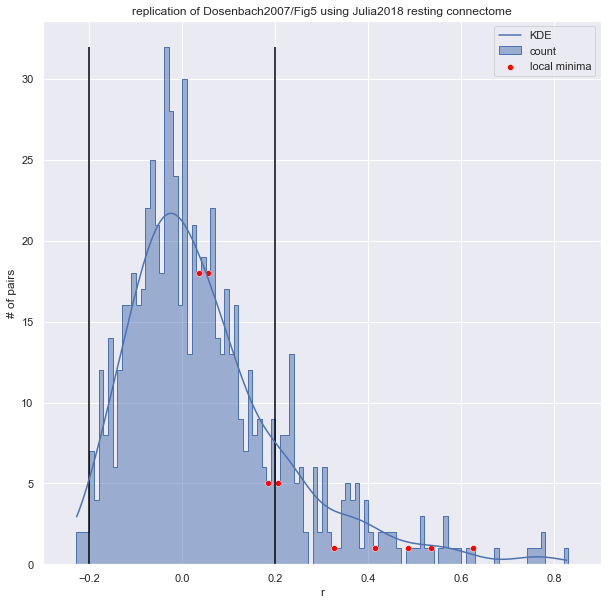

In [3]:
df = pd.read_csv(f'{project_dir}/outputs/julia2018_mean_resting_connectome.tsv',
                 index_col=0, sep='\t')

# sns.heatmap(df)

labels = df.columns.values.tolist()
conn = df.values

# Figure 5 (Supplementary Materials)
conn_vec = conn[np.triu_indices_from(conn, k=1)]  # size=741
bins = np.arange(-1, 1, 0.01) + 0.05
bin_indices = np.digitize(conn_vec, bins)


(unique_bin_indices, counts) = np.unique(bin_indices, return_counts=True)

peaks, _ = find_peaks(-counts, width=2)
peak_bin_indices = unique_bin_indices[peaks]
peaks_x = bins[peak_bin_indices] - 0.005
peaks_y = counts[peaks]

plt.figure(figsize=(10,10))

# plot histogram and KDE
ax = sns.histplot(x=conn_vec, bins=bins, kde=True, element='step')

# plot local minima points
sns.scatterplot(x=peaks_x, y=peaks_y, marker='o', color='red', ax=ax)

ax.set(xlabel='r',
       ylabel='# of pairs',
       xlim=(-.3, .9),
       title='replication of Dosenbach2007/Fig5 using Julia2018 resting connectome')

plt.legend(labels=['KDE', 'count', 'local minima'])

plt.vlines([-.2,0.2],ymin=0, ymax=max(counts),color='black')
plt.show()


TODO:

In the previous figures, an arbitrary value of 0.2 was used to threshold connectivity values. Another way for thresholding is to specifiy the threshold one standard deviation from the median of connectivity values (Cohen, 2014, p433).

In [ ]:
# code

TODO:

But using arbitrary thresholds results in binarized graphs which in turn makes it difficult to compare two different datasets. The methods described above have a shortcoming that they might not keep the same number of edges when applied to different conditions.

To overcome this let's try keeping only the k strongest connections and set the rest to zero.

In [ ]:
# code